23 October 2023

https://carmengg.github.io/eds-220-book/lectures/lesson-9-geopandas-intro.html

# `Geopandas` Intro

`GeoPandas` is a Python library that extends the `pandas` library by adding support for geospatial data. In this lesson we will introduce the `geopandas` library to work with vector data. We will also make our first map.

In [1]:
# this is the library we will explore
import geopandas as gpd

# we will start using matplotlib for making maps
import matplotlib.pyplot as plt

In this lesson we will use simplified point data about wild pigs (*Sus scrofa*) sightings in California, USA from the Global Biodiversity Information Facility.

We can read in a shapefile with `geopandas` by using the `gpd.read_file()` function.

In [2]:
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## `GeoSeries` and `GeoDataFrame`

The core data structure in `GeoPandas` is the `geopandas.GeoDataFrame`. We can think of it as a `pandas.DataFrame` with a dedicated geometry column that can perform spatial operations.

In [3]:
pigs.head(3) # we can see that the right most column is the geometry

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [4]:
# type of the pigs dataframe 
print(type(pigs))

# type of the geometry column
print(type(pigs.geometry))

# type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [5]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [6]:
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Geometric Information

In [7]:
# access the coordinate reference system (CRS) of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# the extent of the geographical area in the geodataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data Wrangling

Suppose we only want to use recent data for wild pig observations. A quick check shows that this dataframe has data since 1818:

In [9]:
# use sort_index() method to order the index
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [10]:
# selet data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# print length of original dataframe
print(len(pigs))

# check length of new dataframe
len(pigs_recent)

1046


606

## Plotting

### `plot()`

Similarly to a `pd.DataFrame`, a `gpd.GeoDataFrame` has a `plot()` method that we can call directly to create a quick view of our data. The geospatial information of the `gpd.GeoDataFrame` will be used to create the axes of the plot.

<AxesSubplot:>

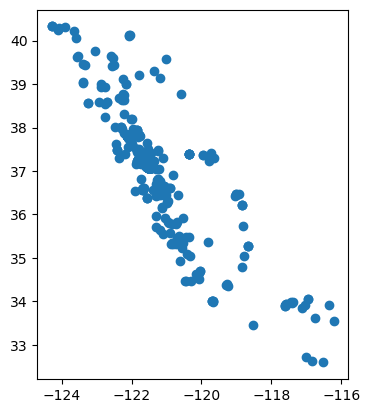

In [14]:
pigs_recent.plot()

### `matplotlib` `fig` and `axis`

```
import matplotlib.pyplot as plt
```

`Matplotlib` graphs the data in a figure which can have one or more axes. The axis is only the area specified by the x-y axis and what is plotted in it. To create a new blank figure:

- Initialize a new figure and axes by calling `pyplot`’s `subplots()` function, and
- show the graph using `plt.show()`

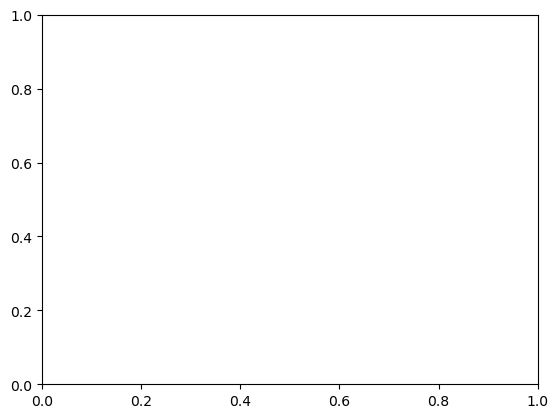

In [12]:
# create a blank figure (fig) with an empty axis (ax)
fig, ax = plt.subplots()

# display figure
plt.show()

Notice we get a figure with a single empty axis. We can think of this step as setting a new blank canvas on which we will paint upon.

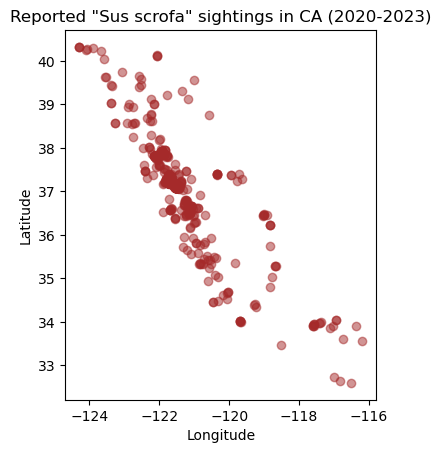

In [15]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='brown'
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

## Exercise

- Open CA boundary shapefile and store it. How may features does it have?
- Add it to the pig sightings plot so that the CA boundry appears behind the points.

In [44]:
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


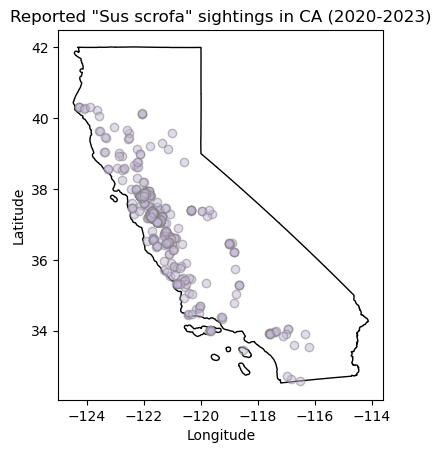

In [50]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
ca_boundary.plot(ax=ax,
                 color='none'
                 )

pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='#c5b6d7',
                 edgecolor='grey'
                 )

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()